# Project - Term Deposit Prediction

# Context
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Dataset:

bank-full.csv - all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

Available from:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


# Problem Statement:
    
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

# Attribute information:

### Bank client data:
    1. age: Continuous feature
    2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
    3. marital: marital status (married, single, divorced)
    4. education: education level (primary, secondary, tertiary)
    5. default: has credit in default?
    6. housing: has housing loan?
    7. loan: has personal loan?
    8. balance in account
### Related to previous contact:
    9. contact: contact communication type
    10. month: last contact month of year
    11. day: last contact day of the month
    12. duration: last contact duration, in seconds*
### Other attributes:
    13. campaign: number of contacts performed during this campaign and for this client
    14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
    15. previous: number of contacts performed before this campaign and for this client
    16. poutcome: outcome of the previous marketing campaign
### Output variable (desired target):
    17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

# Import all modules, adjust notebook, and load the data

In [547]:
# limit warning messages
import warnings
warnings.filterwarnings('ignore')

# import numpy & pandas
from os import system
import numpy as np
import pandas as pd

# import plot libraries & enable plots in Jupyter notebook
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas_profiling

# import sklearn tools
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score,accuracy_score
from sklearn import tree

from IPython.display import Image

# import advanced metrics from yellowbrick
from yellowbrick.classifier import ClassificationReport, ROCAUC

In [329]:
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.3f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 20)           
pd.set_option('display.max_rows', 500) 

In [299]:
# import dataset from csv file
df = pd.read_csv('bank-full.csv')

# Exploratory Data Analysis

In [300]:
# display first 10 rows of data
df.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [301]:
# shape of dataset
df.shape

(45211, 17)

In [302]:
# data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [303]:
# create numeric and object datasets
df_num = df.select_dtypes([np.int64])
df_obj = df.select_dtypes([np.object])

In [304]:
# description of attributes for numerical data types / statistical summary
df_num.describe().transpose()

count      mean       std        min     25%     50%       75%  \
age      45,211.000    40.936    10.619     18.000  33.000  39.000    48.000   
balance  45,211.000 1,362.272 3,044.766 -8,019.000  72.000 448.000 1,428.000   
day      45,211.000    15.806     8.322      1.000   8.000  16.000    21.000   
duration 45,211.000   258.163   257.528      0.000 103.000 180.000   319.000   
campaign 45,211.000     2.764     3.098      1.000   1.000   2.000     3.000   
pdays    45,211.000    40.198   100.129     -1.000  -1.000  -1.000    -1.000   
previous 45,211.000     0.580     2.303      0.000   0.000   0.000     0.000   

                 max  
age           95.000  
balance  102,127.000  
day           31.000  
duration   4,918.000  
campaign      63.000  
pdays        871.000  
previous     275.000

In [305]:
# description of attributes for 'object' data types
df_obj.describe().transpose()

count unique          top   freq
job        45211     12  blue-collar   9732
marital    45211      3      married  27214
education  45211      4    secondary  23202
default    45211      2           no  44396
housing    45211      2          yes  25130
loan       45211      2           no  37967
contact    45211      3     cellular  29285
month      45211     12          may  13766
poutcome   45211      4      unknown  36959
Target     45211      2           no  39922

In [306]:
# summary of missing values (null) for entire dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [307]:
# find number of 'unknown' values in 'object' features of dataset
for i, col in enumerate(df_obj.columns):
    print(col)
    print(df_obj[col].value_counts(normalize=False).iloc[lambda x: x.index == 'unknown'])
    print()

job
unknown    288
Name: job, dtype: int64

marital
Series([], Name: marital, dtype: int64)

education
unknown    1857
Name: education, dtype: int64

default
Series([], Name: default, dtype: int64)

housing
Series([], Name: housing, dtype: int64)

loan
Series([], Name: loan, dtype: int64)

contact
unknown    13020
Name: contact, dtype: int64

month
Series([], Name: month, dtype: int64)

poutcome
unknown    36959
Name: poutcome, dtype: int64

Target
Series([], Name: Target, dtype: int64)



In [308]:
# number of unique values in each column
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

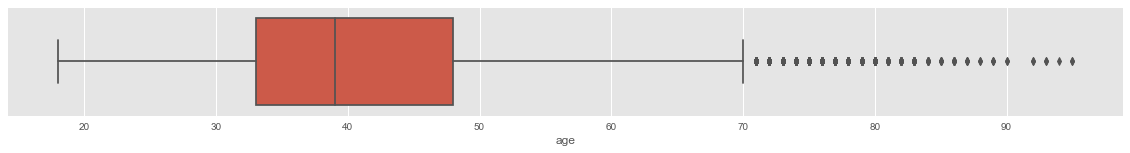

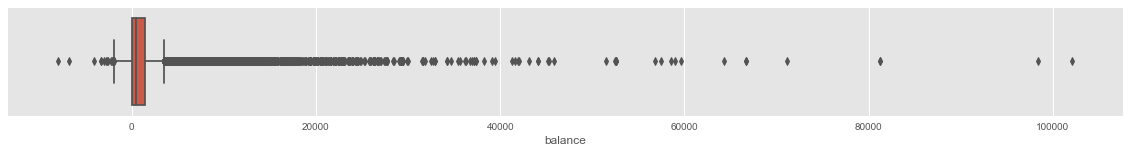

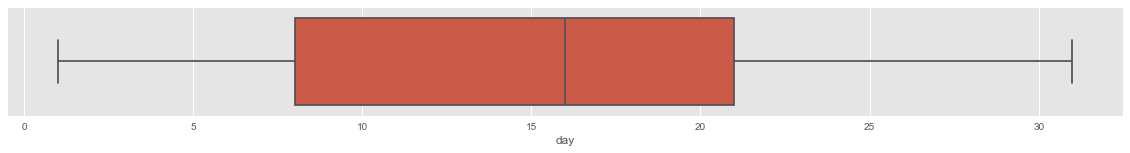

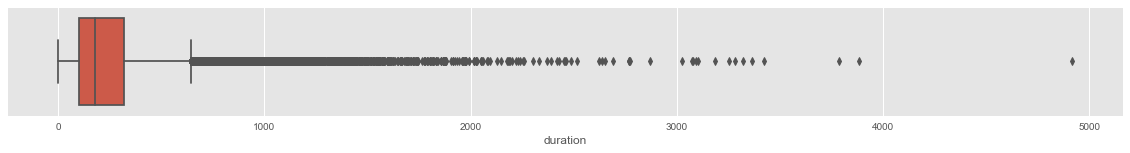

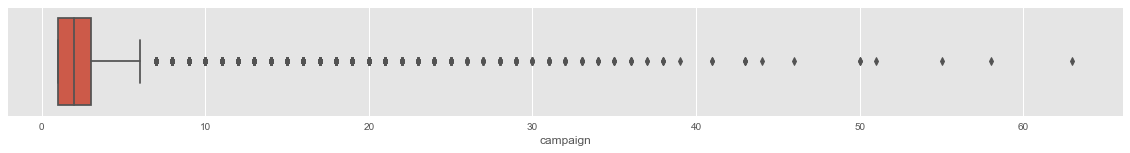

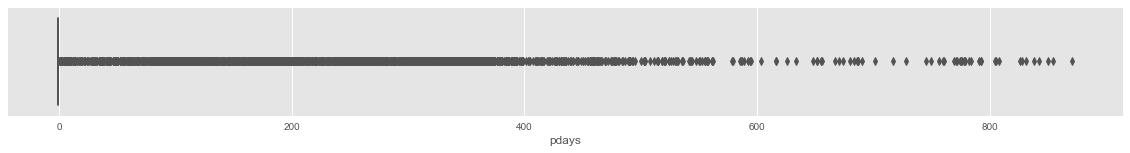

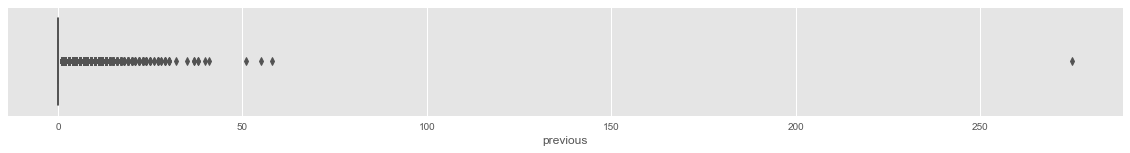

In [309]:
# visualize numerical data distributions with boxplots
for i, col in enumerate(df_num.columns):
    plt.figure(i, figsize=(20,2))
    sns.boxplot(x=df_num[col])
    plt.show()

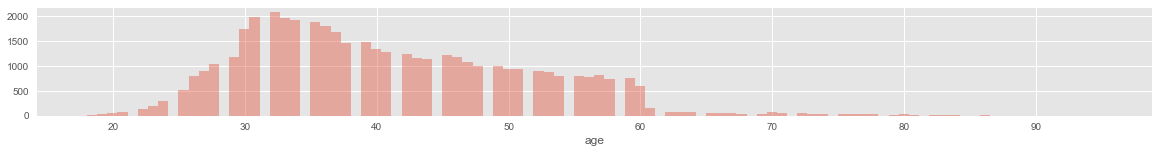

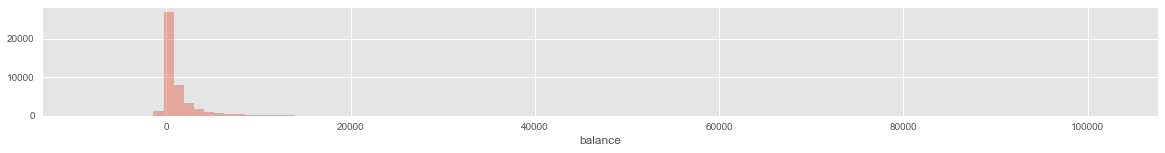

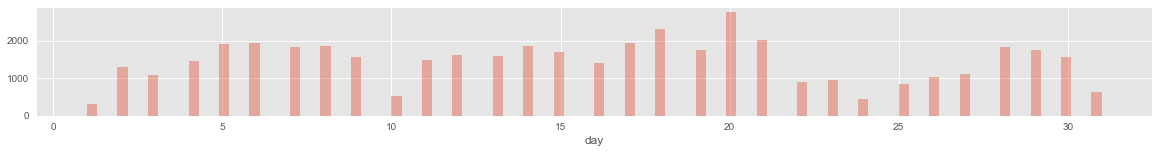

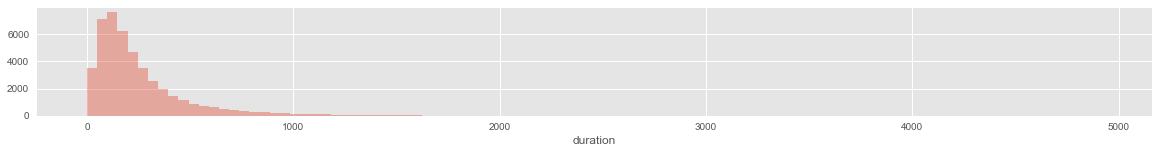

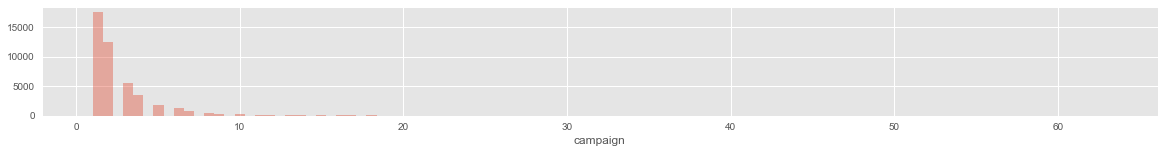

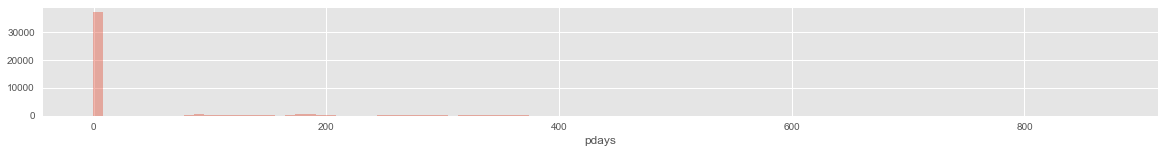

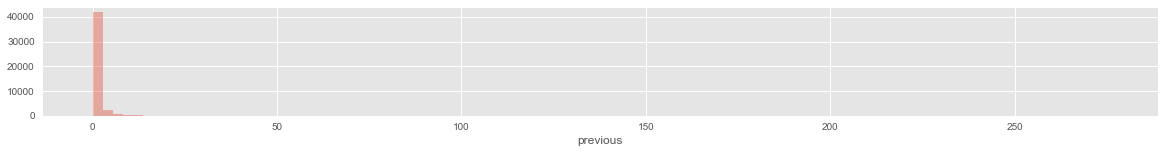

In [310]:
# visualize numerical data distributions with histograms
for i, col in enumerate(df_num.columns):
    plt.figure(i, figsize=(20,2))
    sns.distplot(df_num[col], kde=False, bins=100)
    plt.show()

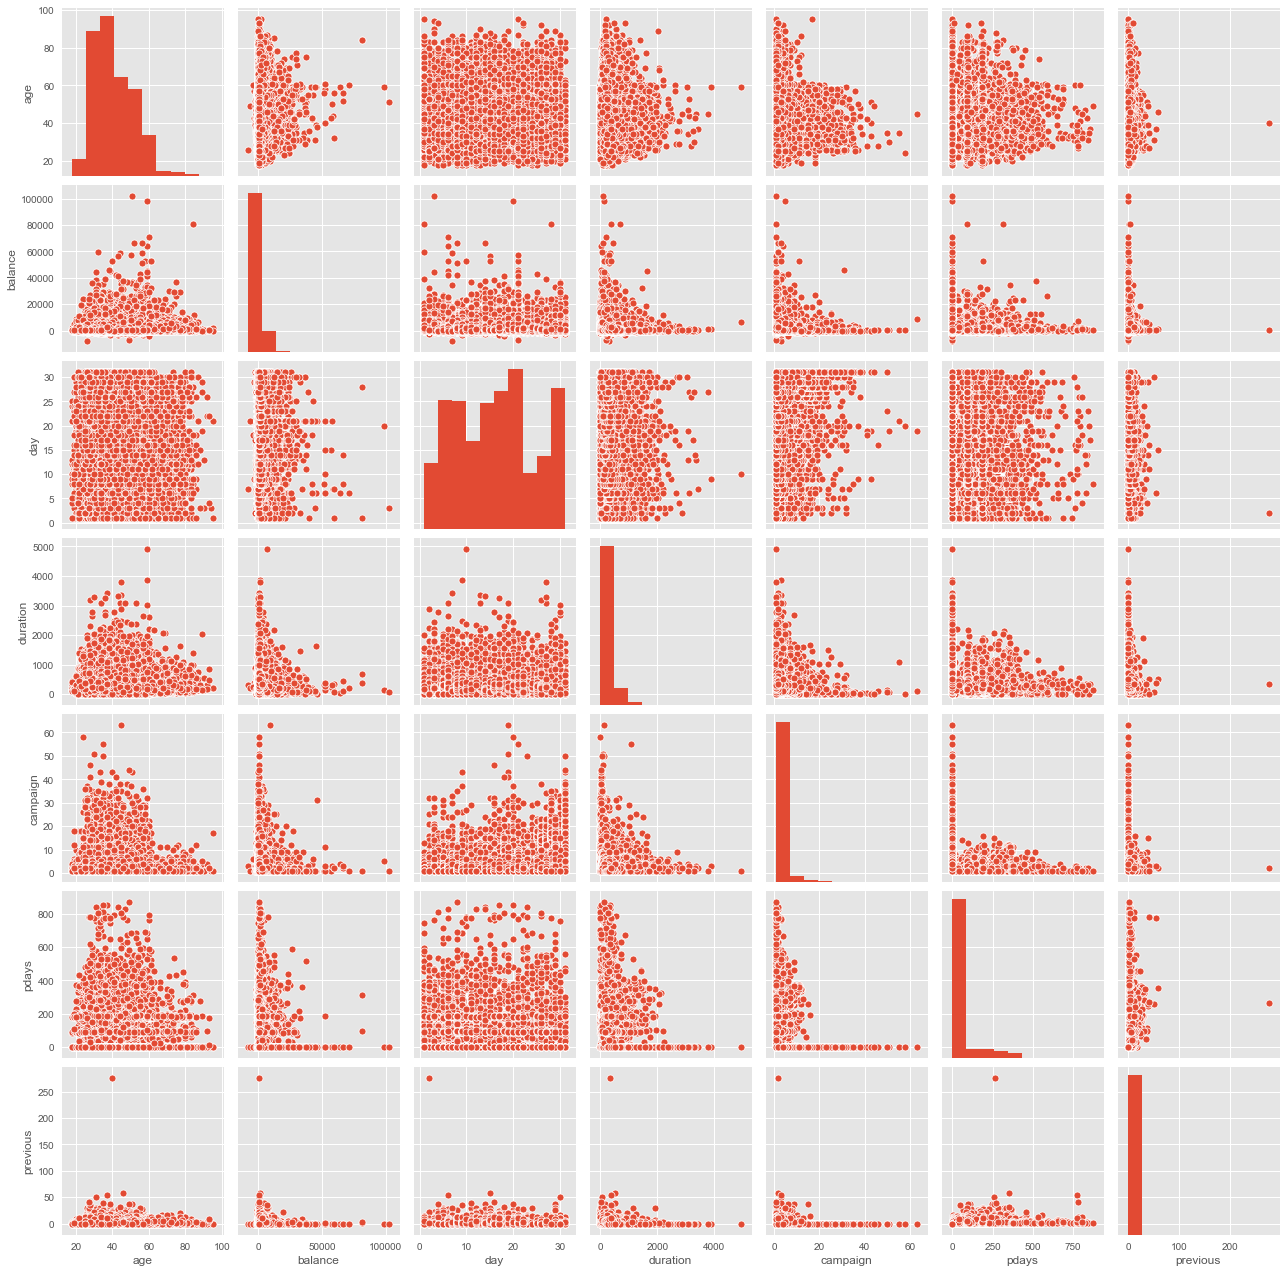

In [311]:
# pairplot numerical data
sns.pairplot(df_num)

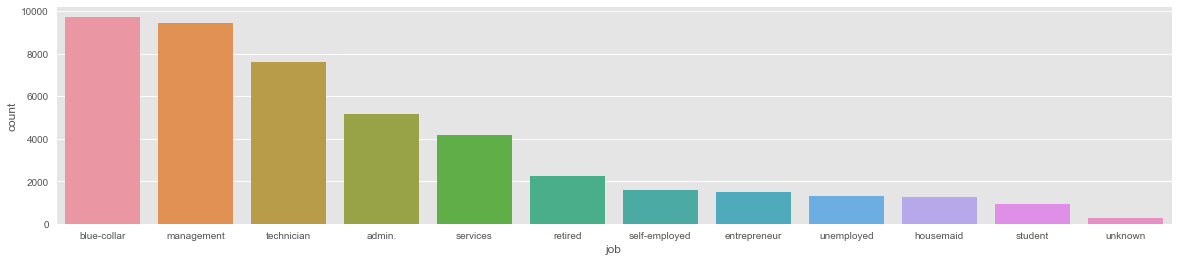

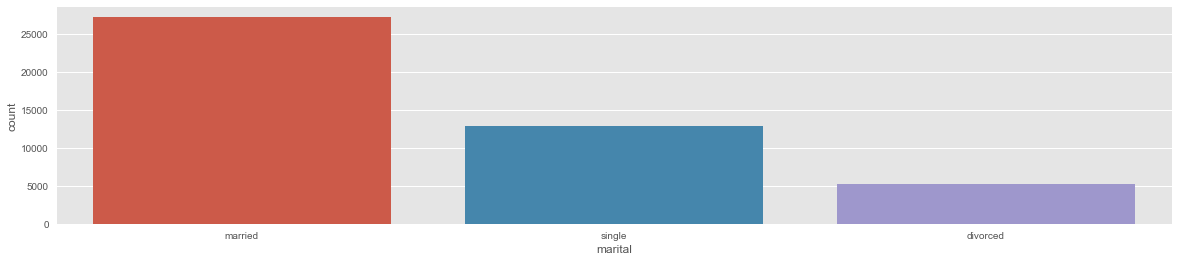

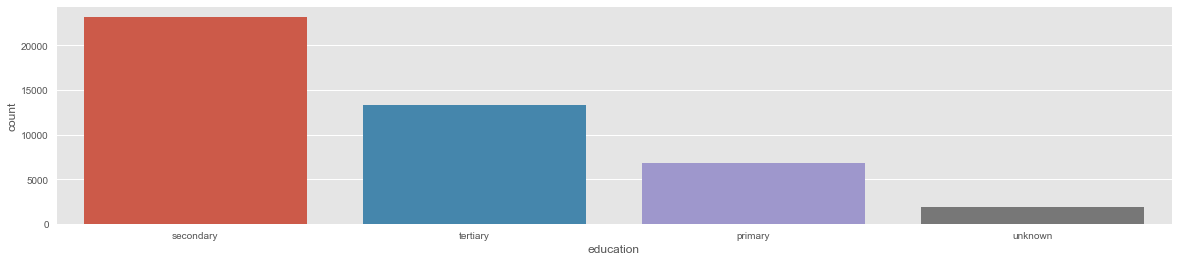

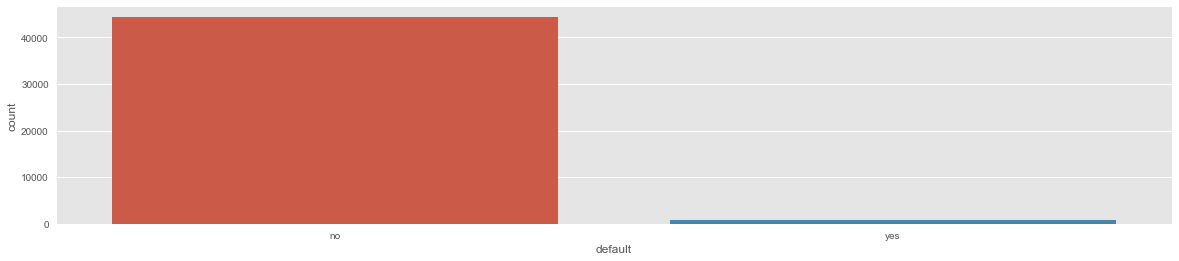

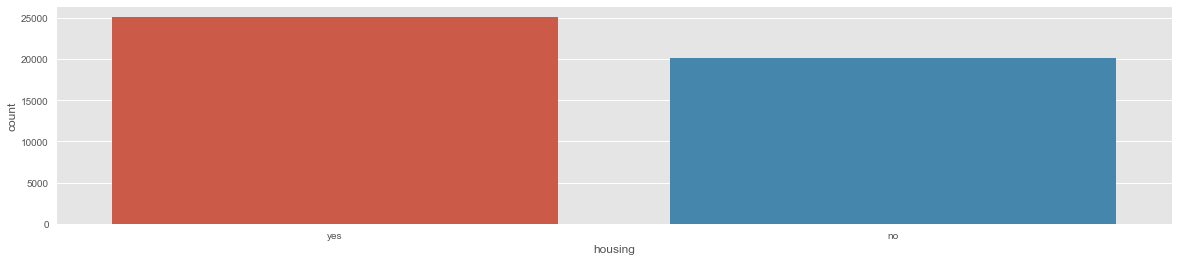

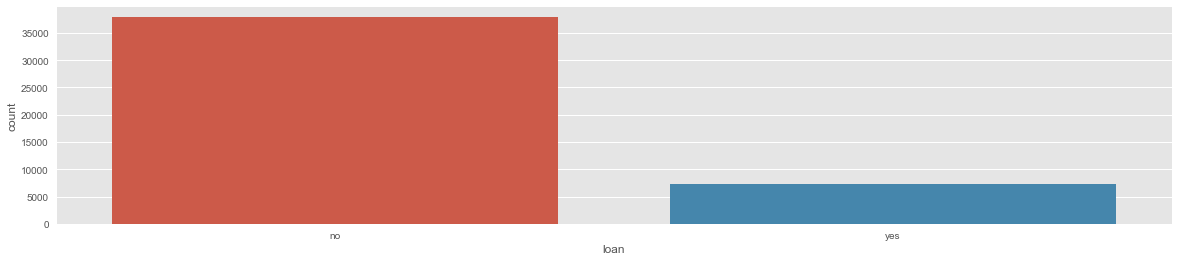

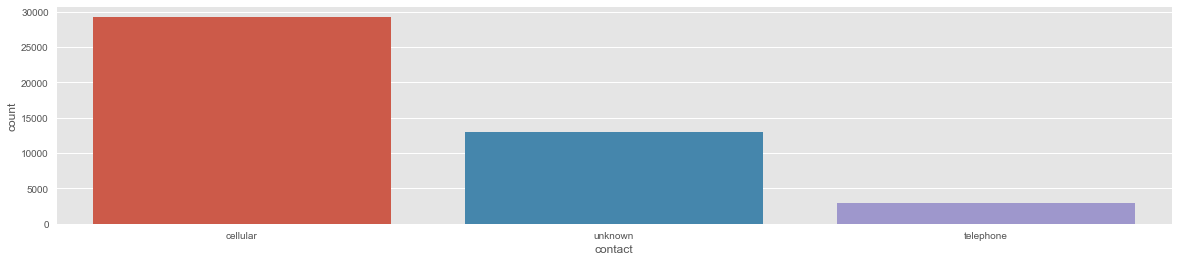

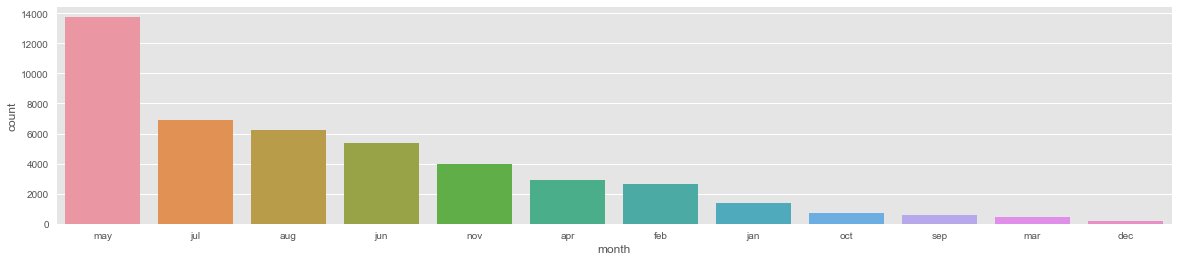

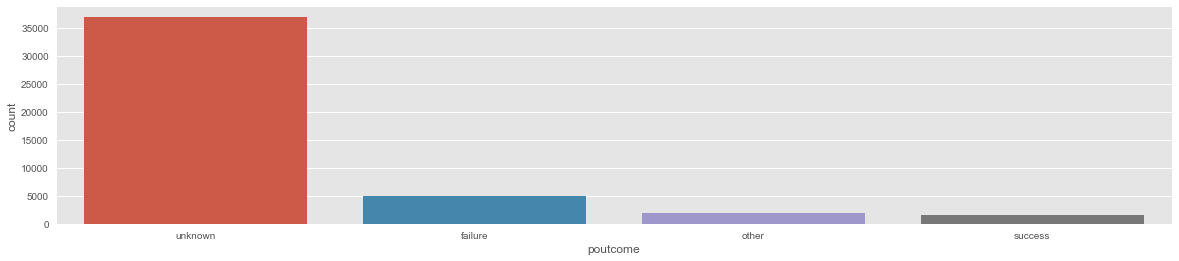

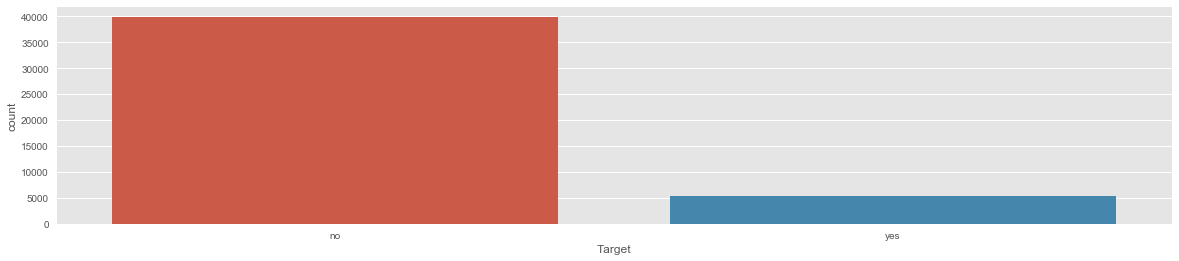

In [312]:
# Visualize object data with countplots (counts in descending order) 
df_obj = df.select_dtypes([np.object])

for i, col in enumerate(df_obj.columns):
    sort_descending = df_obj[col].value_counts().sort_values(ascending=False).index
    plt.figure(i, figsize=(20,4))
    sns.countplot(x=col, order=sort_descending, data=df_obj)
    plt.show()
    

#### Observations:
    1) The dataset contains a mixture of numeric and object datatypes.
    2) The dataset does not appear to have missing or null values, however, it does contain a large number of 'unknown' values.
    3) There are some outliers, invalid values, and special values that will need to be considered. 
    4) **Important note: this dataset's website states that 'duration' should be discarded for a realistic predictive model.

# Prepare Data for Analytics

#### Approach:
    1) We will convert the 'object' features to numeric via one-hot encoding.
    2) Although there is skew in some of the data, we will not adjust this for our initial models.
    3) We will not remove 'unknown' values as these may be important to the model.
    3) We will perform a correlation analysis to help derive relevant features for the model.
    4) We will extract relevant features into the new dataset if possible.

In [319]:
# convert columns with 'object' datatype to categorical variables
df1 = df.copy()
for feature in df1.columns:
    if df1[feature].dtype == 'object':
        df1[feature] = pd.Categorical(df1[feature])

# check dataset infomation again
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [320]:
# one-hot encode categorical features (drop first column to simplify model)
df1 = pd.get_dummies(df1, drop_first=True)

# rename 'Target_yes' column back to 'Target' for clarity
df1.rename(columns={"Target_yes": "Target"}, inplace=True)

# check dataset information again
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

In [321]:
df1.describe().transpose()

count      mean       std        min     25%     50%  \
age                 45,211.000    40.936    10.619     18.000  33.000  39.000   
balance             45,211.000 1,362.272 3,044.766 -8,019.000  72.000 448.000   
day                 45,211.000    15.806     8.322      1.000   8.000  16.000   
duration            45,211.000   258.163   257.528      0.000 103.000 180.000   
campaign            45,211.000     2.764     3.098      1.000   1.000   2.000   
pdays               45,211.000    40.198   100.129     -1.000  -1.000  -1.000   
previous            45,211.000     0.580     2.303      0.000   0.000   0.000   
job_blue-collar     45,211.000     0.215     0.411      0.000   0.000   0.000   
job_entrepreneur    45,211.000     0.033     0.178      0.000   0.000   0.000   
job_housemaid       45,211.000     0.027     0.163      0.000   0.000   0.000   
job_management      45,211.000     0.209     0.407      0.000   0.000   0.000   
job_retired         45,211.000     0.050     0.218      0.000   0.000   0.000   
job_self-employed   45,211.000     0.035     0.184      0.000   0.000   0.000   
job_services        45,211.000     0.092     0.289      0.000   0.000   0.000   
job_student         45,211.000     0.021     0.143      0.000   0.000   0.000   
job_technician      45,211.000     0.168     0.374      0.000   0.000   0.000   
job_unemployed      45,211.000     0.029     0.167      0.000   0.000   0.000   
job_unknown         45,211.000     0.006     0.080      0.000   0.000   0.000   
marital_married     45,211.000     0.602     0.490      0.000   0.000   1.000   
marital_single      45,211.000     0.283     0.450      0.000   0.000   0.000   
education_secondary 45,211.000     0.513     0.500      0.000   0.000   1.000   
education_tertiary  45,211.000     0.294     0.456      0.000   0.000   0.000   
education_unknown   45,211.000     0.041     0.198      0.000   0.000   0.000   
default_yes         45,211.000     0.018     0.133      0.000   0.000   0.000   
housing_yes         45,211.000     0.556     0.497      0.000   0.000   1.000   
loan_yes            45,211.000     0.160     0.367      0.000   0.000   0.000   
contact_telephone   45,211.000     0.064     0.245      0.000   0.000   0.000   
contact_unknown     45,211.000     0.288     0.453      0.000   0.000   0.000   
month_aug           45,211.000     0.138     0.345      0.000   0.000   0.000   
month_dec           45,211.000     0.005     0.069      0.000   0.000   0.000   
month_feb           45,211.000     0.059     0.235      0.000   0.000   0.000   
month_jan           45,211.000     0.031     0.173      0.000   0.000   0.000   
month_jul           45,211.000     0.153     0.360      0.000   0.000   0.000   
month_jun           45,211.000     0.118     0.323      0.000   0.000   0.000   
month_mar           45,211.000     0.011     0.102      0.000   0.000   0.000   
month_may           45,211.000     0.304     0.460      0.000   0.000   0.000   
month_nov           45,211.000     0.088     0.283      0.000   0.000   0.000   
month_oct           45,211.000     0.016     0.127      0.000   0.000   0.000   
month_sep           45,211.000     0.013     0.112      0.000   0.000   0.000   
poutcome_other      45,211.000     0.041     0.198      0.000   0.000   0.000   
poutcome_success    45,211.000     0.033     0.180      0.000   0.000   0.000   
poutcome_unknown    45,211.000     0.817     0.386      0.000   1.000   1.000   
Target              45,211.000     0.117     0.321      0.000   0.000   0.000   

                          75%         max  
age                    48.000      95.000  
balance             1,428.000 102,127.000  
day                    21.000      31.000  
duration              319.000   4,918.000  
campaign                3.000      63.000  
pdays                  -1.000     871.000  
previous                0.000     275.000  
job_blue-collar         0.000       1.000  
job_entrepreneur        0.000       1.000  
job_housemaid       

## Determine Correlation

In [322]:
# Determine correlation of predictor variables and target column
cor = df1.corr()
cor_target = abs(cor["Target"])

# Print features that highly correlated with the target feature
print('Highly Correlated Features (i.e. > 0.5):')
print(cor_target[cor_target>0.5])
print()

# Print features that have some correlation with the target feature
print('Correlated Features (i.e. > 0):')
print(cor_target[cor_target > 0])
print()

# Compare number of features in original dataset with number of correlated features
df1_num_cols = len(df1.columns)
cor_target_num_cols = len(cor_target[cor_target].index)
print('   Dataset Features = ', df1_num_cols)
print('Correlated Features = ', cor_target_num_cols)

Highly Correlated Features (i.e. > 0.5):
Target   1.000
Name: Target, dtype: float64

Correlated Features (i.e. > 0):
age                   0.025
balance               0.053
day                   0.028
duration              0.395
campaign              0.073
pdays                 0.104
previous              0.093
job_blue-collar       0.072
job_entrepreneur      0.020
job_housemaid         0.015
job_management        0.033
job_retired           0.079
job_self-employed     0.001
job_services          0.028
job_student           0.077
job_technician        0.009
job_unemployed        0.020
job_unknown           0.000
marital_married       0.060
marital_single        0.064
education_secondary   0.036
education_tertiary    0.066
education_unknown     0.012
default_yes           0.022
housing_yes           0.139
loan_yes              0.068
contact_telephone     0.014
contact_unknown       0.151
month_aug             0.009
month_dec             0.075
month_feb             0.038
month_jan     

### Observations:
    1) There does not appear to be any strong correlation between two variables.
    2) 'duration' and 'poutcome_success' have the highest correlation.
    3) However, 'duration' should be removed according to this dataset's source website instructions.

## Split Data

In [323]:
X = df1.drop(["Target", "duration"], axis=1)
y = df1.pop("Target")

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# Ensemble Models

## Logistic Regression

In [554]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

       0     1      2      3      4     5      6      7      8      9  ...  \
0 -0.006 0.000 -0.001 -0.086 -0.001 0.014 -0.144 -0.336 -0.317 -0.089  ...   

     32    33     34     35    36    37    38    39     40  intercept  
0 0.232 0.982 -0.473 -0.857 0.806 0.722 0.074 2.025 -0.166     -0.490  

[1 rows x 42 columns]


In [586]:
# Score the model
model_var  = model
model_name = 'Logistic Regression'

print('Training Data Score:', model_var.score(X_train, y_train))
print('    Test Data Score:', model_var.score(X_test, y_test))

y_predict = model_var.predict(X_test)

model_accuracy  = model_var.score(X_test, y_test)
model_recall    = recall_score(y_test,y_predict)
model_precision = precision_score(y_test,y_predict)
model_f1        = f1_score(y_test,y_predict)
model_roc_auc   = roc_auc_score(y_test,y_predict)

model_scores = {'Method': [model_name], 
                'Accuracy': model_accuracy, 
                'Recall': model_recall,
                'Precision': model_precision,
                'F1': model_f1,
                'ROC AUC': model_roc_auc
               }

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame(model_scores)
resultsDf = resultsDf[['Method', 'Accuracy', 'Recall', 'Precision','F1', 'ROC AUC']]
resultsDf

Training Data Score: 0.8908901317660441
    Test Data Score: 0.893320554408729


Method  Accuracy  Recall  Precision    F1  ROC AUC
0  Logistic Regression     0.893   0.175      0.618 0.273    0.581

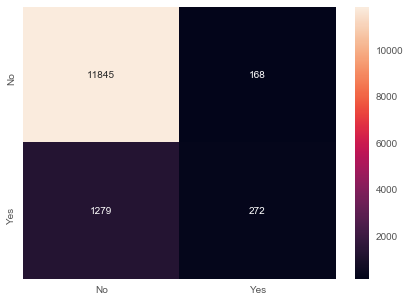

In [563]:
# Dsiplay the Confusion Matrix
y_predict = model.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

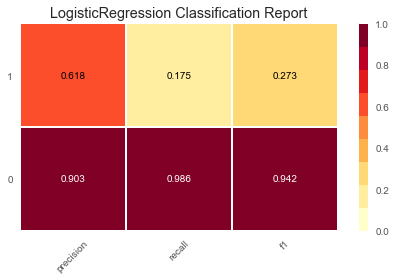

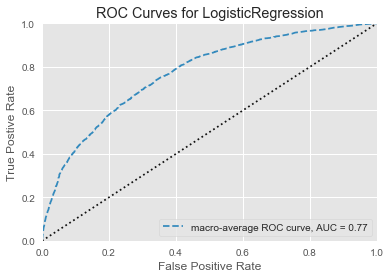

In [557]:
# Visualize model performance with yellowbrick library
lg = LogisticRegression(solver = 'liblinear')

viz = ClassificationReport(lg)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(lg, macro=True, micro=False, per_class=False)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();

## Decision Tree Algorithm

In [429]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [538]:
# Score the decision tree
print('Training Data Score:', dTree.score(X_train, y_train))
print('    Test Data Score:', dTree.score(X_test, y_test))

Training Data Score: 1.0
    Test Data Score: 0.8291801828369213


In [540]:
# Comments: Decision tree as is over-fitted, we will need to regularize this below

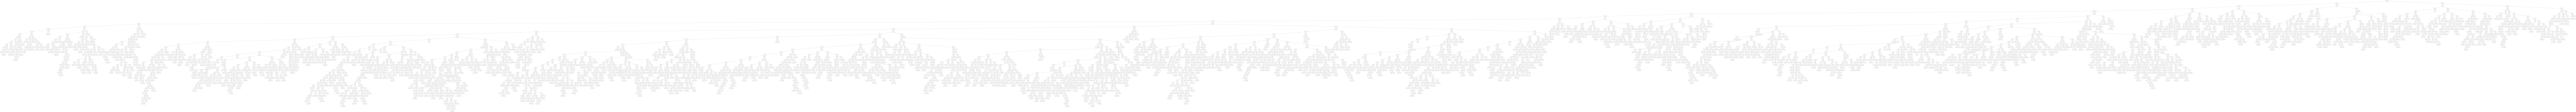

In [431]:
# Visualize the tree (Works only if "dot" command works on you machine)
train_char_label = ['No', 'Yes']
Decision_Tree_File = open('decision_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Decision_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Decision_Tree_File.close()

# Note: 
retCode = system("dot -Tpng decision_tree.dot -o decision_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("decision_tree.png"))

In [432]:
# Reducing Overfitting of model
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)

# Comment: We get slightly better results with 'max_depth = 5' but with greater complexity for the model.


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [587]:
# Score the model
model_var  = dTreeR
model_name = 'Decision Tree'

print('Training Data Score:', model_var.score(X_train, y_train))
print('    Test Data Score:', model_var.score(X_test, y_test))

y_predict = model_var.predict(X_test)

model_accuracy  = model_var.score(X_test, y_test)
model_recall    = recall_score(y_test,y_predict)
model_precision = precision_score(y_test,y_predict)
model_f1        = f1_score(y_test,y_predict)
model_roc_auc   = roc_auc_score(y_test,y_predict)

model_scores = {'Method': model_name, 
                'Accuracy': model_accuracy, 
                'Recall': model_recall,
                'Precision': model_precision,
                'F1': model_f1,
                'ROC AUC': model_roc_auc
               }

# Record the score for later comparison
resultsDf.loc[1] = model_scores
resultsDf

Training Data Score: 0.8925332574967612
    Test Data Score: 0.8956060159245061


Method  Accuracy  Recall  Precision    F1  ROC AUC
0  Logistic Regression     0.893   0.175      0.618 0.273    0.581
1        Decision Tree     0.896   0.180      0.660 0.283    0.584

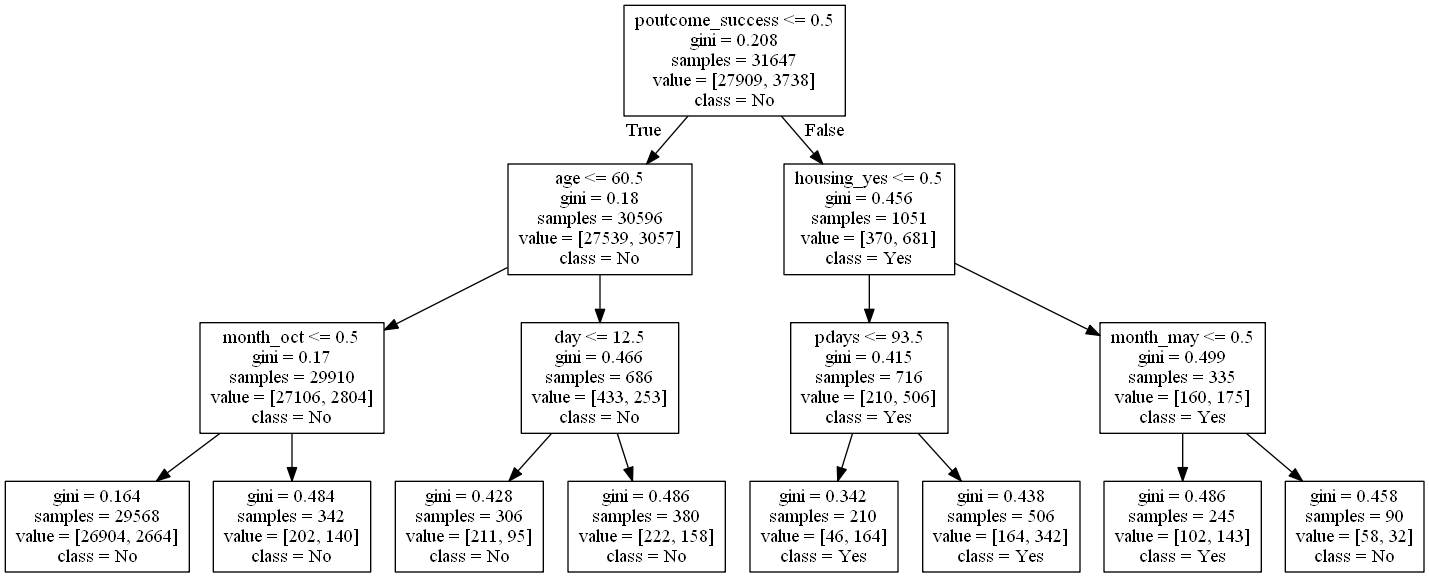

In [434]:
# Visualize Reduced Tree Model
train_char_label = ['No', 'Yes']
Decision_Tree_FileR = open('decision_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Decision_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Decision_Tree_FileR.close()

#Works only if "dot" command works on you machine
retCode = system("dot -Tpng decision_treeR.dot -o decision_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("decision_treeR.png"))

0.8956060159245061


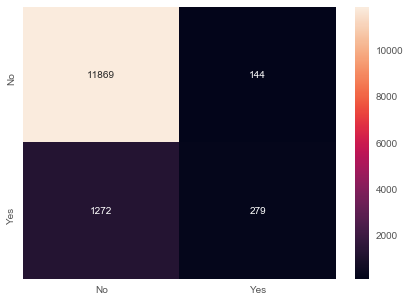

In [435]:
# Dsiplay the Confusion Matrix
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

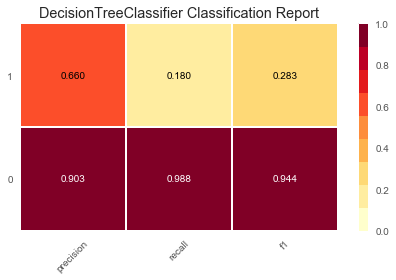

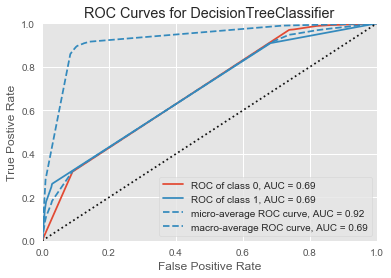

In [436]:
viz = ClassificationReport(DecisionTreeClassifier(criterion = "gini", max_depth=3))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=3))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [437]:
# Calculate feature importance
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                      Imp
age                 0.125
balance             0.000
day                 0.005
campaign            0.000
pdays               0.004
previous            0.000
job_blue-collar     0.000
job_entrepreneur    0.000
job_housemaid       0.000
job_management      0.000
job_retired         0.000
job_self-employed   0.000
job_services        0.000
job_student         0.000
job_technician      0.000
job_unemployed      0.000
job_unknown         0.000
marital_married     0.000
marital_single      0.000
education_secondary 0.000
education_tertiary  0.000
education_unknown   0.000
default_yes         0.000
housing_yes         0.019
loan_yes            0.000
contact_telephone   0.000
contact_unknown     0.000
month_aug           0.000
month_dec           0.000
month_feb           0.000
month_jan           0.000
month_jul           0.000
month_jun           0.000
month_mar           0.000
month_may           0.008
month_nov           0.000
month_oct           0.085
month_sep   

## Random Forest Classifier

In [494]:
# Build Random Forest Model
rfcl = RandomForestClassifier(n_estimators = 30)
rfcl = rfcl.fit(X_train, y_train)

In [588]:
# Score the model
model_var  = rfcl
model_name = 'Random Forest'

print('Training Data Score:', model_var.score(X_train, y_train))
print('    Test Data Score:', model_var.score(X_test, y_test))

y_predict = model_var.predict(X_test)

model_accuracy  = model_var.score(X_test, y_test)
model_recall    = recall_score(y_test,y_predict)
model_precision = precision_score(y_test,y_predict)
model_f1        = f1_score(y_test,y_predict)
model_roc_auc   = roc_auc_score(y_test,y_predict)

model_scores = {'Method': model_name, 
                'Accuracy': model_accuracy, 
                'Recall': model_recall,
                'Precision': model_precision,
                'F1': model_f1,
                'ROC AUC': model_roc_auc
               }

# Record the score for later comparison
resultsDf.loc[2] = model_scores
resultsDf

Training Data Score: 0.996934938540778
    Test Data Score: 0.8926570333235034


Method  Accuracy  Recall  Precision    F1  ROC AUC
0  Logistic Regression     0.893   0.175      0.618 0.273    0.581
1        Decision Tree     0.896   0.180      0.660 0.283    0.584
2        Random Forest     0.893   0.227      0.578 0.326    0.603

0.8926570333235034


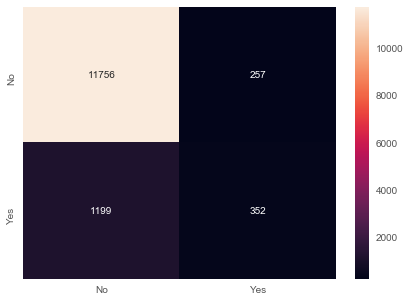

In [550]:
# Display the Confusion Matrix
y_predict = rfcl.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

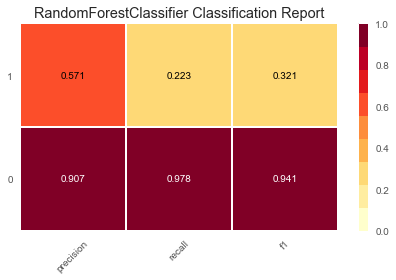

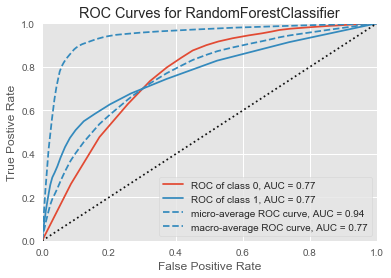

In [497]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 30))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 30))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Bagging Classifier Algorithm

In [518]:
# Build Bagging Classifier Model
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [589]:
# Score the model
model_var  = bgcl
model_name = 'Bagging'

print('Training Data Score:', model_var.score(X_train, y_train))
print('    Test Data Score:', model_var.score(X_test, y_test))

y_predict = model_var.predict(X_test)

model_accuracy  = model_var.score(X_test, y_test)
model_recall    = recall_score(y_test,y_predict)
model_precision = precision_score(y_test,y_predict)
model_f1        = f1_score(y_test,y_predict)
model_roc_auc   = roc_auc_score(y_test,y_predict)

model_scores = {'Method': model_name, 
                'Accuracy': model_accuracy, 
                'Recall': model_recall,
                'Precision': model_precision,
                'F1': model_f1,
                'ROC AUC': model_roc_auc
               }

# Record the score for later comparison
resultsDf.loc[3] = model_scores
resultsDf

Training Data Score: 0.9825575883970045
    Test Data Score: 0.8935417281038042


Method  Accuracy  Recall  Precision    F1  ROC AUC
0  Logistic Regression     0.893   0.175      0.618 0.273    0.581
1        Decision Tree     0.896   0.180      0.660 0.283    0.584
2        Random Forest     0.893   0.227      0.578 0.326    0.603
3              Bagging     0.894   0.251      0.579 0.351    0.614

0.8935417281038042


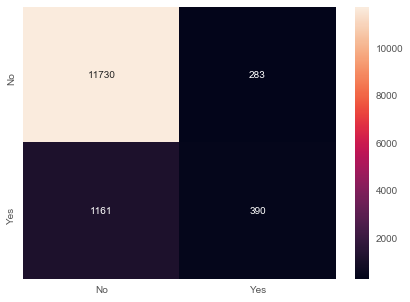

In [552]:
# Dispaly the Confusion Matrix
y_predict = bgcl.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

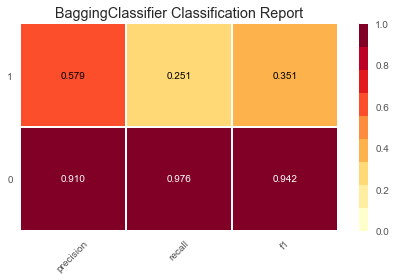

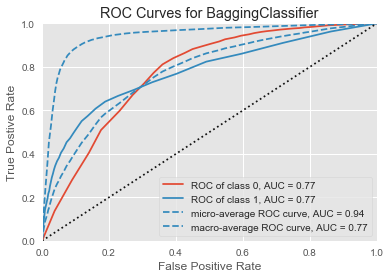

In [520]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=1))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Adaboost Classifier Algorithm

In [521]:
# Build Adaboost Classifier Model
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=1)
abcl = abcl.fit(X_train, y_train)

In [590]:
# Score the model
model_var  = abcl
model_name = 'Adaboost'

print('Training Data Score:', model_var.score(X_train, y_train))
print('    Test Data Score:', model_var.score(X_test, y_test))

y_predict = model_var.predict(X_test)

model_accuracy  = model_var.score(X_test, y_test)
model_recall    = recall_score(y_test,y_predict)
model_precision = precision_score(y_test,y_predict)
model_f1        = f1_score(y_test,y_predict)
model_roc_auc   = roc_auc_score(y_test,y_predict)

model_scores = {'Method': model_name, 
                'Accuracy': model_accuracy, 
                'Recall': model_recall,
                'Precision': model_precision,
                'F1': model_f1,
                'ROC AUC': model_roc_auc
               }

# Record the score for later comparison
resultsDf.loc[4] = model_scores
resultsDf

Training Data Score: 0.890826934622555
    Test Data Score: 0.8937629017988794


Method  Accuracy  Recall  Precision    F1  ROC AUC
0  Logistic Regression     0.893   0.175      0.618 0.273    0.581
1        Decision Tree     0.896   0.180      0.660 0.283    0.584
2        Random Forest     0.893   0.227      0.578 0.326    0.603
3              Bagging     0.894   0.251      0.579 0.351    0.614
4             Adaboost     0.894   0.128      0.691 0.216    0.560

In [ ]:
# Display the confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

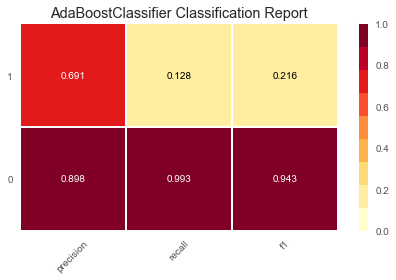

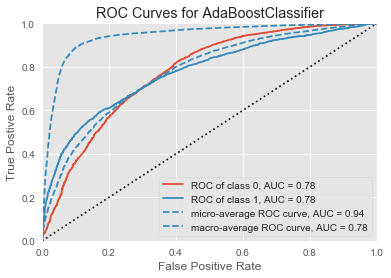

In [524]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=1))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Gradient Boost Algorithm

In [534]:
# Build Gradient Boost Algorithm Model
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [591]:
# Score the model
model_var  = gbcl
model_name = 'Gradient Boost'

print('Training Data Score:', model_var.score(X_train, y_train))
print('    Test Data Score:', model_var.score(X_test, y_test))

y_predict = model_var.predict(X_test)

model_accuracy  = model_var.score(X_test, y_test)
model_recall    = recall_score(y_test,y_predict)
model_precision = precision_score(y_test,y_predict)
model_f1        = f1_score(y_test,y_predict)
model_roc_auc   = roc_auc_score(y_test,y_predict)

model_scores = {'Method': model_name, 
                'Accuracy': model_accuracy, 
                'Recall': model_recall,
                'Precision': model_precision,
                'F1': model_f1,
                'ROC AUC': model_roc_auc
               }

# Record the score for later comparison
resultsDf.loc[5] = model_scores
resultsDf

Training Data Score: 0.8952823332385376
    Test Data Score: 0.8950162194043055


Method  Accuracy  Recall  Precision    F1  ROC AUC
0  Logistic Regression     0.893   0.175      0.618 0.273    0.581
1        Decision Tree     0.896   0.180      0.660 0.283    0.584
2        Random Forest     0.893   0.227      0.578 0.326    0.603
3              Bagging     0.894   0.251      0.579 0.351    0.614
4             Adaboost     0.894   0.128      0.691 0.216    0.560
5       Gradient Boost     0.895   0.182      0.645 0.284    0.584

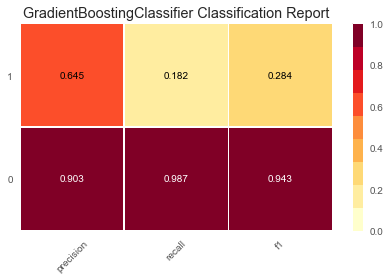

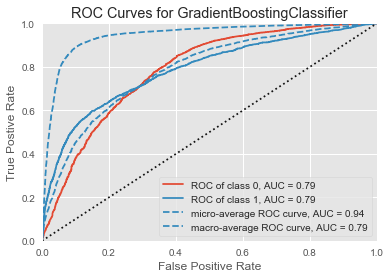

In [542]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=1))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Model Comparisons and Results

In [592]:
# Print dataset of comparison scores for the different models
resultsDf

Method  Accuracy  Recall  Precision    F1  ROC AUC
0  Logistic Regression     0.893   0.175      0.618 0.273    0.581
1        Decision Tree     0.896   0.180      0.660 0.283    0.584
2        Random Forest     0.893   0.227      0.578 0.326    0.603
3              Bagging     0.894   0.251      0.579 0.351    0.614
4             Adaboost     0.894   0.128      0.691 0.216    0.560
5       Gradient Boost     0.895   0.182      0.645 0.284    0.584

### Selection of best algorithm:

Here the bank wants to better target their marketing towards customers that have the highest likelihood of taking a Term Deposit.  **False Negatives is the important metric** because this is missed revenue by customers that would have taken a Term Deposit. Hence **Recall is the important metric**.

In the case of False Positives, the bank would lose minimal marketing costs.

In the case of False Negatives, the bank would miss revenue from missed loans that customers would have taken.

All of the models had very high and similar accuracy.  However, the **Bagging** and **Random Forest** algorithms have the highest Recall scores.
